In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('big_mart_train.csv')
test = pd.read_csv('big_mart_test.csv')
%matplotlib inline

In [2]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [3]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [20]:
#merging the test dataset with train to get more insights on our dataset
target = train['Item_Outlet_Sales']
train1 = train.drop('Item_Outlet_Sales',axis = 1)
df = pd.concat([train1,test],axis = 0) #dataset with both train and test

In [5]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df['Item_Weight'].mean()

12.792854228644991

In [8]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
#filling the null values
df1 = df.copy()

In [10]:
df1['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)
df1['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace = True) #Mode[0] as the values of mode can be more than 1

In [11]:
df1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [19]:
pd.set_option('display.max_columns', None)
df1.head(2)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [13]:
df1.nunique()

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='Item_MRP'>

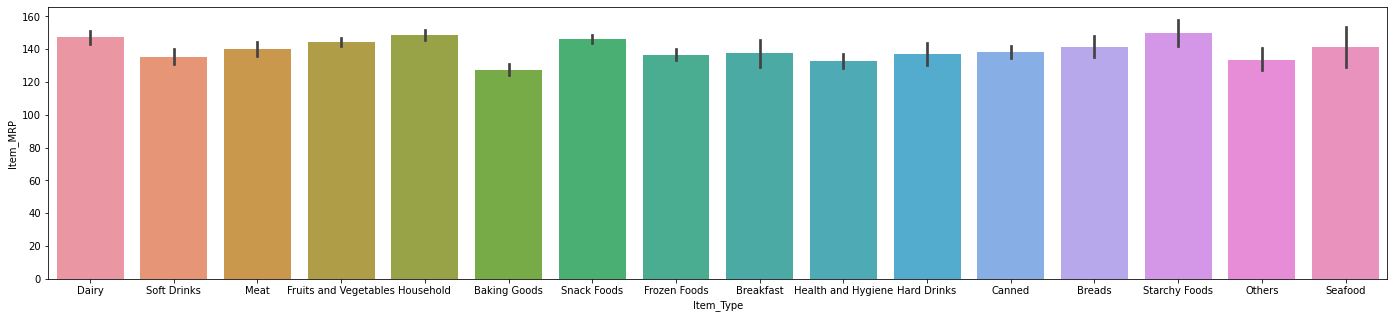

In [14]:
plt.figure(figsize = (24,5))
sns.barplot(x= 'Item_Type',y = 'Item_MRP',data = df1)

[[0       3735.1380
  1        443.4228
  2       2097.2700
  3        732.3800
  4        994.7052
            ...    
  8518    2778.3834
  8519     549.2850
  8520    1193.1136
  8521    1845.5976
  8522     765.6700
  Name: Item_Outlet_Sales, Length: 8523, dtype: float64]]